In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [16]:
df_train = pd.read_csv("F16GVT_Files/BenchmarkData/F16Data_FullMSine_Level3.csv").to_numpy()
df_train = pd.read_csv("F16GVT_Files/BenchmarkData/F16Data_FullMSine_Level2_Validation.csv").to_numpy()
# u_train, y_train = (df_train[:7372, :2], df_train[:7372, 2:5])
u_train, y_train = (df_train[:, :2], df_train[:, 2:5])
u_1 = u_train[:, 0]
u_2 = u_train[:, 1]
y_1 = y_train[:, 0]
y_2 = y_train[:, 1]
y_3 = y_train[:, 2]

In [17]:
def current_y1(k, y_1, y_2, y_3, u_1, u_2,):
    theta_1 = -1.6700*10**(-6)  
    theta_9 = 2.7303*10**(-2)
    theta_2 = -1.3290*10**(1)  
    theta_10 = 8.9096*10**(-1)
    theta_3 = -1.3223*10**(-1)  
    theta_11 = 3.2454*10**(-2) 
    theta_4 = 1.0062*10**(-2)   
    theta_12 = -3.4526*10**(-2) 
    theta_5 = -1.2047*10**(-4)  
    theta_13 = 1.1254 
    theta_6 = -5.7903*10**(-2)  
    theta_14 = -2.2313*10**(-2) 
    theta_7 = -2.4344*10**(-2)  
    theta_15 = -5.3931*10**(-3) 
    theta_8 = 2.2236*10**(-4)   
    theta_16 = -4.4652*10**(-6) 

    y_1 = (theta_1 +
                theta_2 * u_2[k-151] * u_2[k-36] * u_2[k-29] +
                theta_3 * y_1[k-6] +
                theta_4 * u_2[k-121] +
                theta_5 * y_1[k-119] * y_3[k-56] * y_3[k-73] +
                theta_6 * u_1[k-1] +
                theta_7 * y_2[k-16] +
                theta_8 * u_2[k-51] * y_3[k-299] +
                theta_9 * u_1[k-3] +
                theta_10 * u_2[k-1] +
                theta_11 * u_1[k-1] +
                theta_12 * u_2[k-26] +
                theta_13 * y_1[k-1] +
                theta_14 * y_3[k-1] +
                theta_15 * y_2[k-38] +
                theta_16 * y_2[k-33] * y_2[k-59])
    return y_1


In [18]:
def current_y2(k, y_1, y_2, y_3, u_1, u_2):
    theta_1 = 1.1263e-04
    theta_2 = 8.7606e-02
    theta_3 = 1.6556e-01
    theta_4 = -3.5583e-02
    theta_5 = -1.1182e-01
    theta_6 = 1.0334
    theta_7 = 3.0293e-02
    theta_8 = -7.5928e-01
    theta_9 = 2.2289e-03
    theta_10 = 1.6481e-04
    theta_11 = 1.1650e-01
    theta_12 = -1.1738e-01
    theta_13 = -1.8939e-02
    theta_14 = 3.0810e-04
    theta_15 = -3.1265e-03
    theta_16 = 2.9317e-01

    y_2_k = (theta_1 +
             theta_2 * u_2[k-1] +
             theta_3 * y_1[k-1] +
             theta_4 * y_2[k-29] +
             theta_5 * y_2[k-9] +
             theta_6 * y_2[k-1] +
             theta_7 * u_2[k-11] +
             theta_8 * u_2[k-8] +
             theta_9 * u_1[k-17] +
             theta_10 * y_2[k-298] +
             theta_11 * y_3[k-26] +
             theta_12 * y_1[k-17] +
             theta_13 * y_1[k-27] +
             theta_14 * y_1[k-176] * y_2[k-196] +
             theta_15 * u_1[k-4] +
             theta_16 * u_2[k-16])

    return y_2_k

In [19]:
def current_y3(k, y_1, y_2, y_3, u_1, u_2):
    theta_1 = 1.0666e-04
    theta_2 = -1.0913e-02
    theta_3 = 8.2237e-01
    theta_4 = -9.0093e-02
    theta_5 = -1.9534e-03
    theta_6 = 1.0429
    theta_7 = -5.3396e-10
    theta_8 = 2.2410e-04
    theta_9 = -3.0372e-04
    theta_10 = -1.0278
    theta_11 = 1.7559e-01
    theta_12 = 1.3317e-03
    theta_13 = -1.3210e-01
    theta_14 = -4.0725e-02
    theta_15 = -2.6218e-05
    theta_16 = 6.2009e-02

    y_3_k = (theta_1 +
             theta_2 * y_1[k-29] +
             theta_3 * u_2[k-1] +
             theta_4 * y_3[k-6] +
             theta_5 * y_2[k-93] +
             theta_6 * y_3[k-1] +
             theta_7 * u_1[k-151] * u_1[k-141] +
             u_1[k-116] * y_2[k-93] * y_2[k-105] +
             theta_8 * y_1[k-116] * y_2[k-140] +
             theta_9 * y_1[k-446] * y_1[k-241] +
             theta_10 * u_2[k-16] +
             theta_11 * y_1[k-1] +
             theta_12 * y_2[k-304] +
             theta_13 * y_1[k-16] +
             theta_14 * y_1[k-6] +
             theta_15 * u_1[k-39] +
             theta_16 * y_2[k-26])

    return y_3_k

In [20]:
samples = 1001
result_y1 = list()
result_y2 = list()
result_y3 = list()

for i in range(samples):
    result_y1.append(current_y1(k=i+1000, y_1=y_1, y_2=y_2, y_3=y_3, u_1=u_1, u_2=u_2))
    result_y2.append(current_y2(k=i+1000, y_1=y_1, y_2=y_2, y_3=y_3, u_1=u_1, u_2=u_2))
    result_y3.append(current_y3(k=i+1000, y_1=y_1, y_2=y_2, y_3=y_3, u_1=u_1, u_2=u_2))

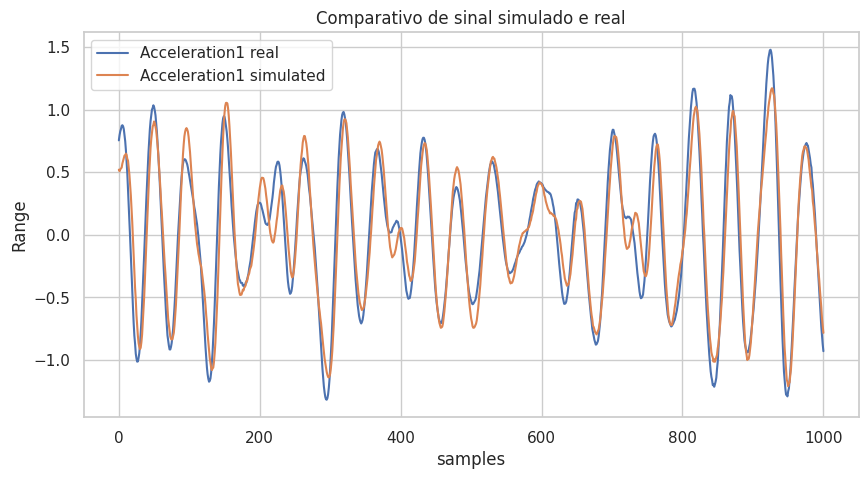

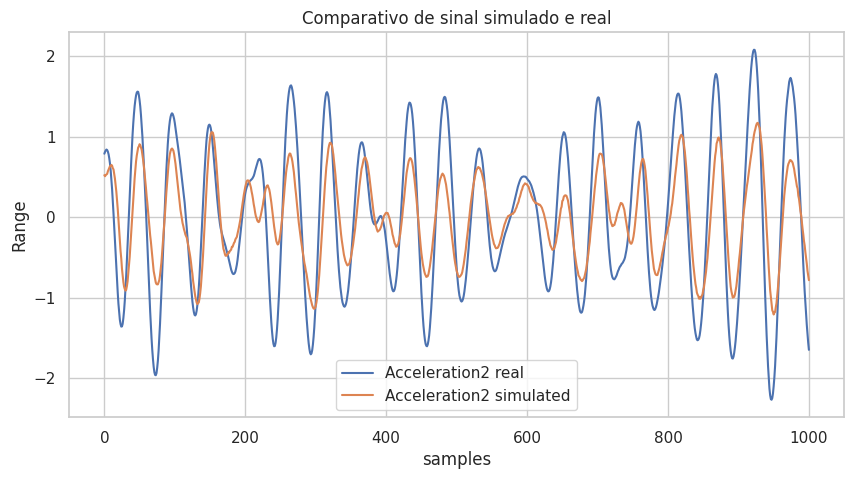

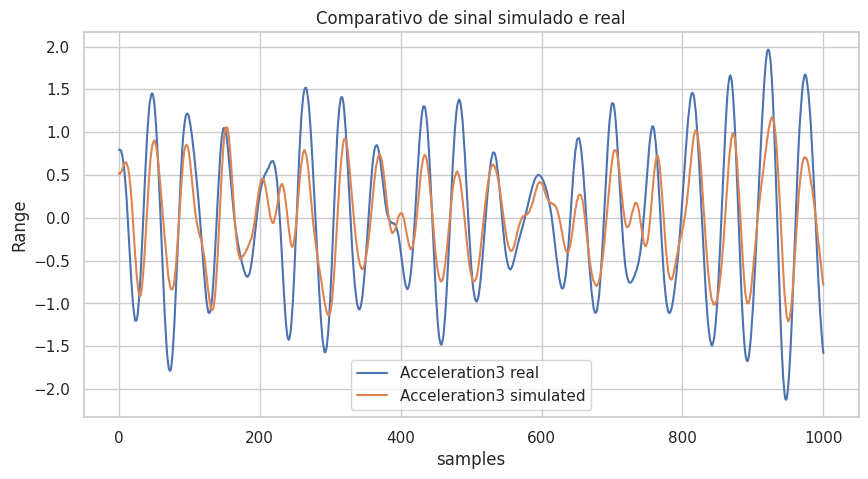

In [22]:
final_result_y1 = pd.DataFrame({
    'real':y_1[1000:samples+1000],
    'simulated': result_y1
})

plt.figure(figsize=(10, 5))
sns.lineplot(data=final_result_y1, x=final_result_y1.index, y='real', label='Acceleration1 real')
sns.lineplot(data=final_result_y1, x=final_result_y1.index, y='simulated', label='Acceleration1 simulated')

plt.title('Comparativo de sinal simulado e real')
plt.xlabel('samples')
plt.ylabel('Range')
plt.legend()
plt.savefig("acceleration1.png")
plt.show()

final_result_y2 = pd.DataFrame({
    'real':y_2[1000:samples+1000],
    'simulated': result_y1
})

plt.figure(figsize=(10, 5))
sns.lineplot(data=final_result_y2, x=final_result_y2.index, y='real', label='Acceleration2 real')
sns.lineplot(data=final_result_y2, x=final_result_y2.index, y='simulated', label='Acceleration2 simulated')

plt.title('Comparativo de sinal simulado e real')
plt.xlabel('samples')
plt.ylabel('Range')
plt.legend()
plt.savefig("acceleration2.png")
plt.show()

final_result_y3 = pd.DataFrame({
    'real':y_3[1000:samples+1000],
    'simulated': result_y1
})

plt.figure(figsize=(10, 5))
sns.lineplot(data=final_result_y3, x=final_result_y3.index, y='real', label='Acceleration3 real')
sns.lineplot(data=final_result_y3, x=final_result_y3.index, y='simulated', label='Acceleration3 simulated')

plt.title('Comparativo de sinal simulado e real')
plt.xlabel('samples')
plt.ylabel('Range')
plt.legend()
plt.savefig("acceleration3.png")
plt.show()